In [1]:
import pickle
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,0,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01,314.640015
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,0,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01,311.359985
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,0,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,309.720001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,0,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01,304.809998
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,0,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,298.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,0,1/20/2016 3:40,Standard Class,Maria Peterson,2016,1,5,3,2016-01,399.980011
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,0,1/19/2016 1:34,Second Class,Ronald Clark,2016,1,5,1,2016-01,395.980011
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,0,1/20/2016 21:00,Standard Class,John Smith,2016,1,4,21,2016-01,391.980011
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,0,1/18/2016 20:18,Standard Class,Mary Smith,2016,1,4,20,2016-01,387.980011


In [2]:
# Modeling 对于欺诈订单进行预测
import numpy as np
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['Delivery Status'].value_counts()
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [3]:
import pandas as pd
# 显示所有列

pd.set_option('display.max_columns', None)
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,298.250000,0,0


In [4]:
#  去掉无用的列 Customer Email、Product Image、Customer Password 、Customer Fname、Customer Lname
train_data.drop(['Customer Email','Product Image','Customer Password','Customer Fname','Customer Lname','Order Status','Delivery Status'],axis=1,inplace=True )

In [5]:
# 去掉不重要的字段
train_data.drop(['Order Zipcode', 'Product Description','Customer Full Name'],axis = 1, inplace=True)
train_data.drop(['Latitude','Longitude','Customer Street','Product Status','Product Status','Order Item Id','Product Card Id','Order Customer Id'],axis = 1, inplace=True)
train_data.drop(['shipping date (DateOrders)','order date (DateOrders)','order_month_year'],axis = 1, inplace=True)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Category Id,Product Name,Product Price,Shipping Mode,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,Pacific Asia,Bekasi,Indonesia,77202,1360,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,73,Smart watch,327.750000,Standard Class,2018,1,2,22,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,Pacific Asia,Bikaner,India,75939,1360,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,73,Smart watch,327.750000,Standard Class,2018,1,5,12,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,Pacific Asia,Bikaner,India,75938,1360,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,73,Smart watch,327.750000,Standard Class,2018,1,5,12,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,Pacific Asia,Townsville,Australia,75937,1360,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,73,Smart watch,327.750000,Standard Class,2018,1,5,11,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,Pacific Asia,Townsville,Australia,75936,1360,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,73,Smart watch,327.750000,Standard Class,2018,1,5,11,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,11207.0,7,Fan Shop,Pacific Asia,Shanghái,China,26043,1004,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,1,5,3,399.980011,0,0
180515,DEBIT,3,2,-613.770019,395.980011,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,93304.0,7,Fan Shop,Pacific Asia,Hirakata,Japón,26037,1004,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,2016,1,5,1,395.980011,0,1
180516,TRANSFER,5,4,141.110001,391.980011,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,6010.0,7,Fan Shop,Pacific Asia,Adelaide,Australia,26024,1004,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,1,4,21,391.980011,0,1
180517,PAYMENT,3,4,186.229996,387.980011,0,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,725.0,7,Fan Shop,Pacific Asia,Adelaide,Australia,26022,1004,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,1,4,20,387.980011,0,0


In [6]:
# 查看变量类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols
numerical_cols = train_data.select_dtypes(exclude='object').columns

In [7]:
# 使用labelencorder进行标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categorical_cols:
    train_data[column] = le.fit_transform(train_data[column])

In [8]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Category Id,Product Name,Product Price,Shipping Mode,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,0,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,1360,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,15,475,73,78,327.750000,3,2018,1,2,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,1,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,1360,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,13,841,73,78,327.750000,3,2018,1,5,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,0,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,1360,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,13,841,73,78,327.750000,3,2018,1,5,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,0,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,1360,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,11,835,73,78,327.750000,3,2018,1,5,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,0,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,1360,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,11,835,73,78,327.750000,3,2018,1,5,11,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,0,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,1004,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,7,913,45,24,399.980011,3,2016,1,5,3,399.980011,0,0
180515,1,3,2,-613.770019,395.980011,1,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,1004,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,7,770,45,24,399.980011,2,2016,1,5,1,395.980011,0,1
180516,3,5,4,141.110001,391.980011,1,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,1004,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,11,88,45,24,399.980011,3,2016,1,4,21,391.980011,0,1
180517,2,3,4,186.229996,387.980011,0,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,1004,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,11,88,45,24,399.980011,3,2016,1,4,20,387.980011,0,0


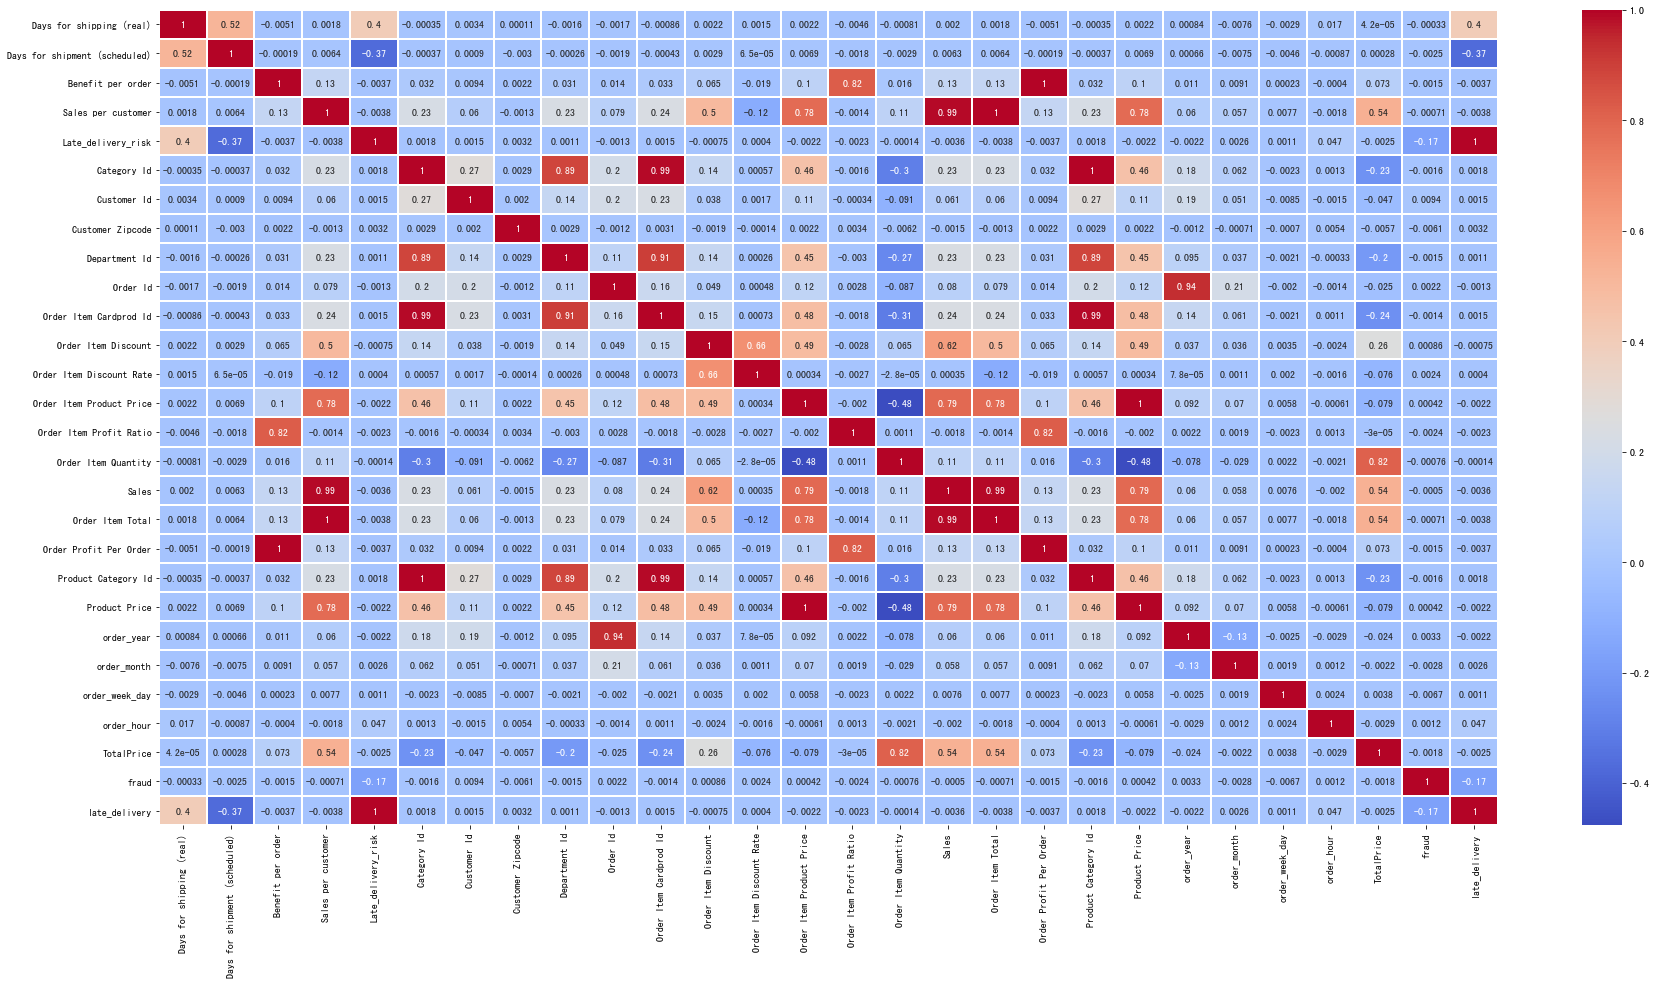

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
temp = train_data[numerical_cols]
sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, linewidths=1)
plt.show()

In [10]:
# 去掉重复的强相关字段
train_data.drop([ 'Product Category Id','Sales','Order Item Total','Order Item Cardprod Id', 'Product Price','Late_delivery_risk'],axis = 1, inplace=True)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Profit Per Order,Order Region,Order State,Product Name,Shipping Mode,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,91.250000,15,475,78,3,2018,1,2,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,-249.089996,13,841,78,3,2018,1,5,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,-247.779999,13,841,78,3,2018,1,5,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,22.860001,11,835,78,3,2018,1,5,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,134.210007,11,835,78,3,2018,1,5,11,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,40.000000,7,913,24,3,2016,1,5,3,399.980011,0,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,-613.770019,7,770,24,2,2016,1,5,1,395.980011,0,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,141.110001,11,88,24,3,2016,1,4,21,391.980011,0,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,186.229996,11,88,24,3,2016,1,4,20,387.980011,0,0


In [11]:
from sklearn.model_selection import train_test_split
# 构造model，对是否fraud进行预测
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data['fraud']
# 切分数据集
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)

# 构造model，对是否late_delivery进行预测
x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']
# 切分数据集
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

In [12]:
# 数据规范化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [13]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
# 需要对fraud， late_delivery完成评估
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print('Model used:', model)
    print('{} Accuracy: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} Confusion Matrix:\n {}'.format(name, confusion))
    print('{} F1 Score: {}%'.format(name, f1*100))
    return accuracy, recall, f1

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# 逻辑回归模型
LR_fraud = LogisticRegression()
LR_late = LogisticRegression()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(LR_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(LR_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuracy: 97.83957456237536%
Fraud Recall: 21.551724137931032%
Fraud Confusion Matrix:
 [[35149   143]
 [  637   175]]
Fraud F1 Score: 30.973451327433633%
Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Late Delivery Accuracy: 98.79237757589186%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[16034   436]
 [    0 19634]]
Late Delivery F1 Score: 98.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:

# 高斯朴素贝叶斯模型
GaussianNB_fraud = GaussianNB()
GaussianNB_late = GaussianNB()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(GaussianNB_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(GaussianNB_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: GaussianNB(priors=None, var_smoothing=1e-09)
Fraud Accuracy: 87.94039441613117%
Fraud Recall: 100.0%
Fraud Confusion Matrix:
 [[30938  4354]
 [    0   812]]
Fraud F1 Score: 27.166276346604217%
Model used: GaussianNB(priors=None, var_smoothing=1e-09)
Late Delivery Accuracy: 56.71670729005096%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[  843 15627]
 [    0 19634]]
Late Delivery F1 Score: 71.5329264960379%


In [16]:
# svm模型
svm_fraud = LinearSVC()
svm_late = LinearSVC()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(svm_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(svm_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model used: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Fraud Accuracy: 97.83957456237536%
Fraud Recall: 18.96551724137931%
Fraud Confusion Matrix:
 [[35170   122]
 [  658   154]]
Fraud F1 Score: 28.308823529411764%
Model used: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Late Delivery Accuracy: 98.79237757589186%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[16034   436]
 [    0 19634]]
Late Delivery F1 Score: 98.90187386661293%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
# KNN模型
knn_fraud = KNeighborsClassifier()
knn_late = KNeighborsClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(knn_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(knn_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Fraud Accuracy: 97.78694881453579%
Fraud Recall: 5.911330049261084%
Fraud Confusion Matrix:
 [[35257    35]
 [  764    48]]
Fraud F1 Score: 10.726256983240223%
Model used: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Late Delivery Accuracy: 85.40327941502326%
Late Delivery Recall: 86.74747886319649%
Late Delivery Confusion Matrix:
 [[13802  2668]
 [ 2602 17032]]
Late Delivery F1 Score: 86.60192200132202%


In [18]:
# LDA模型
LDA_fraud = LinearDiscriminantAnalysis()
LDA_late = LinearDiscriminantAnalysis()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(LDA_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(LDA_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Fraud Accuracy: 97.92820740084201%
Fraud Recall: 42.857142857142854%
Fraud Confusion Matrix:
 [[35008   284]
 [  464   348]]
Fraud F1 Score: 48.199445983379505%
Model used: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Late Delivery Accuracy: 98.26612009749613%
Late Delivery Recall: 99.26148517877151%
Late Delivery Confusion Matrix:
 [[15989   481]
 [  145 19489]]
Late Delivery F1 Score: 98.41935158064842%


In [19]:
# 决策树模型
tree_fraud = DecisionTreeClassifier()
tree_late = DecisionTreeClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(tree_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(tree_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fraud Accuracy: 99.02780855306891%
Fraud Recall: 79.92610837438424%
Fraud Confusion Matrix:
 [[35104   188]
 [  163   649]]
Fraud F1 Score: 78.71437234687691%
Model used: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                      

In [20]:
# 随机森林模型
RF_fraud = RandomForestClassifier()
RF_late = RandomForestClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(RF_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(RF_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Fraud Accuracy: 98.66773764679813%
Fraud Recall: 42.364532019704434%
Fraud Confusion Matrix:
 [[35279    13]
 [  468   344]]
Fraud F1 Score: 58.853721129170225%
Model used: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_i

In [21]:
from xgboost import XGBClassifier
# XGBoost模型
XGB_fraud = XGBClassifier()
XGB_late = XGBClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(XGB_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
acc_late, recall_late, f1_late = model_stats(XGB_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Fraud Accuracy: 98.93640593840017%
Fraud Recall: 60.09852216748769%
Fraud Confusion Matrix:
 [[35232    60]
 [  324   488]]
Fraud F1 Score: 71.76470588235294%
Model used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction

In [22]:
# 根据XGBoost模型，得到feature importance
important_col = XGB_fraud.feature_importances_.argsort()
important_col

array([29, 24,  8, 27, 13,  4, 23,  5, 19, 20, 21,  6,  3, 33, 22, 14, 15,
       16, 17, 12,  7, 26, 30, 25, 32, 18, 11,  9, 31, 10,  2,  1, 28, 34,
        0])

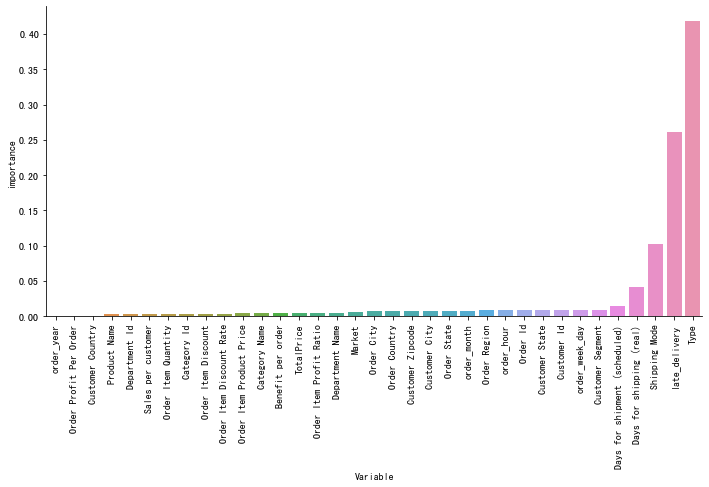

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# 对于fraud模型重要特征的可视化
feat_importance = pd.DataFrame({'Variable':x_fraud.columns[important_col], 'importance': XGB_fraud.feature_importances_[important_col]})
sns.catplot(x='Variable', y='importance', data=feat_importance, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

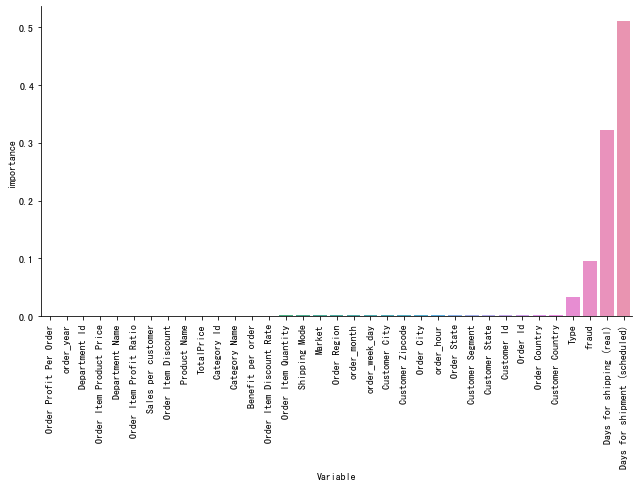

In [24]:
# 对于late_delivery模型重要特征的可视化
important_col = XGB_late.feature_importances_.argsort()
important_col
feat_importance = pd.DataFrame({'Variable':x_late.columns[important_col], 'importance': XGB_late.feature_importances_[important_col]})
sns.catplot(x='Variable', y='importance', data=feat_importance, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

In [25]:
x_fraud_train.shape

(144415, 35)

In [26]:
# 使用神经网络进行分类
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# BN层，在每个batch上将前一层的激活值重新规范福安，使得输出的数据均值为0，标准差为1

clf = Sequential()
clf.add(Dense(1024, activation='relu', input_dim=35))
clf.add(BatchNormalization())
clf.add(Dense(512, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(256, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(128, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(64, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(32, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(1, activation='sigmoid'))
clf.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
clf.fit(x_fraud_train, y_fraud_train, batch_size=1024, epochs=10)

Epoch 1/10
142/142 [==============================] - 14s 96ms/step - loss: 0.4692 - acc: 0.8832
Epoch 2/10
142/142 [==============================] - 14s 99ms/step - loss: 0.1397 - acc: 0.9794
Epoch 3/10
142/142 [==============================] - 11s 78ms/step - loss: 0.0741 - acc: 0.9800
Epoch 4/10
142/142 [==============================] - 10s 72ms/step - loss: 0.0590 - acc: 0.9811
Epoch 5/10
142/142 [==============================] - 11s 75ms/step - loss: 0.0528 - acc: 0.9818
Epoch 6/10
142/142 [==============================] - 10s 71ms/step - loss: 0.0477 - acc: 0.9829
Epoch 7/10
142/142 [==============================] - 10s 74ms/step - loss: 0.0452 - acc: 0.9834
Epoch 8/10
142/142 [==============================] - 13s 93ms/step - loss: 0.0411 - acc: 0.9851
Epoch 9/10
142/142 [==============================] - 10s 72ms/step - loss: 0.0356 - acc: 0.9869
Epoch 10/10
142/142 [==============================] - 11s 74ms/step - loss: 0.0347 - acc: 0.9872


In [28]:
train_eval = clf.evaluate(x_fraud_train, y_fraud_train)
test_eval = clf.evaluate(x_fraud_test, y_fraud_test)
print('Train Evaluation:', train_eval)
print('Test Evaluation:', test_eval)

1129/1129 [==============================] - 6s 5ms/step - loss: 0.0519 - acc: 0.9823
Train Evaluation: [0.024379732087254524, 0.9915105700492859]
Test Evaluation: [0.051922332495450974, 0.9823288321495056]


In [29]:
y_fraud_pred = clf.predict_classes(x_fraud_test, batch_size=1024, verbose=1)
#y_fraud_pred = np.argmax(y_fraud_pred,axis=1)
#print(y_fraud_pred)
print('F1 Score:',f1_score(y_fraud_test,y_fraud_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
36/36 [==============================] - 0s 9ms/step
F1 Score: 0.5370101596516691


In [30]:
train_data[['Sales per customer', 'Order Item Quantity']]

,Sales per customer,Order Item Quantity
0,314.640015,1
1,311.359985,1
2,309.720001,1
3,304.809998,1
4,298.250000,1
...,...,...
180514,399.980011,1
180515,395.980011,1
180516,391.980011,1
180517,387.980011,1


In [31]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
# 需要对Sales,Quantity 完成回归预测
def regression_model_stats(model, x_train, x_test, y_train, y_test, name='Sales'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse= mean_squared_error(y_test,y_pred, squared=False)
    
    print('Model used:', model)
    print('{} MAE: {}%'.format(name, mae))
    print('{} MSE: {}%'.format(name, mse))
    print('{} RMSE: {}'.format(name, rmse))

    return mae, mse, rmse

In [32]:
x_sales = train_data.loc[:, train_data.columns != 'Sales per customer']
y_sales = train_data['Sales per customer']
# 数据集切分
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

x_quantity = train_data.loc[:, train_data.columns != 'Order Item Quantity']
y_quantity = train_data['Order Item Quantity']
# 数据集切分
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)

In [33]:
# 数据规范化
sc = StandardScaler()
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)
x_quantity_train = sc.fit_transform(x_quantity_train)
x_quantity_test = sc.transform(x_quantity_test)

In [34]:
from sklearn.linear_model import LinearRegression
# 构建线性回归模型
LR_Sales = LinearRegression()
LR_Quantity = LinearRegression()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(LR_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
mae, mse, rmse = regression_model_stats(LR_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Sales MAE: 10.637344605002607%
Sales MSE: 185.95730571725971%
Sales RMSE: 13.636616358806158
Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Quantity MAE: 0.3509803340926878%
Quantity MSE: 0.2771436177897876%
Quantity RMSE: 0.5264443159440394


In [35]:
from sklearn.linear_model import Lasso
# 构建Lasso模型
lasso_Sales = Lasso()
lasso_Quantity = Lasso()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(lasso_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
mae, mse, rmse = regression_model_stats(lasso_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Sales MAE: 11.567552483546779%
Sales MSE: 205.9773579803862%
Sales RMSE: 14.351911300603351
Model used: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Quantity MAE: 1.140063947237094%
Quantity MSE: 1.7063690305976997%
Quantity RMSE: 1.306280609439526


In [36]:
from sklearn.linear_model import Ridge
# 构建Ridge模型
ridge_Sales = Ridge()
ridge_Quantity = Ridge()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(ridge_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
mae, mse, rmse = regression_model_stats(ridge_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Sales MAE: 10.637495717440643%
Sales MSE: 185.9564033755082%
Sales RMSE: 13.636583273514967
Model used: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Quantity MAE: 0.35099929093147375%
Quantity MSE: 0.2771427101258377%
Quantity RMSE: 0.526443453873099


In [37]:
from xgboost import XGBRegressor
# 构建XGB模型
XGB_Sales = XGBRegressor()
XGB_Quantity = XGBRegressor()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(XGB_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
mae, mse, rmse = regression_model_stats(XGB_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Sales MAE: 0.21038546883948872%
Sales MSE: 0.37165748644953006%
Sales RMSE: 0.6096371760723996
Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, 